# Exploratory Data Analysis (EDA)

## Summary

This notebook performs comprehensive exploratory data analysis on the prepared forest loss dataset. It visualizes trends, relationships, and patterns to understand global forest loss dynamics and inform predictive modeling.

## Key Analyses

1. **Global Forest Loss Trends**: 
   - Annual tree cover loss trends from 2001-2024
   - Identifies peak loss years and overall patterns

2. **Top Countries Analysis**:
   - Countries with highest total tree cover loss
   - Tree cover extent by country

3. **Deforestation Drivers**:
   - Distribution of loss by driver type (agriculture, logging, wildfire, etc.)
   - Comparison of driver contributions globally

4. **Carbon Emissions vs Forest Loss**:
   - Correlation analysis between forest loss and carbon emissions
   - Dual-axis time series visualization
   - Scatter plot with trend line (correlation: ~0.907)

5. **Correlation Matrix**:
   - Relationships between core variables
   - Identifies multicollinearity for modeling considerations

6. **Primary vs Total Forest Loss**:
   - Comparison of primary forest loss to total tree cover loss
   - Proportion analysis and trend alignment

## Key Findings

- **Strong correlation** (r=0.907) between tree cover loss and carbon emissions
- **Primary forest loss** is highly correlated (r=0.846) with total loss
- **Driver variables** show moderate correlations (0.43-0.54) with forest loss
- **Recent years** (2016-2017, 2023-2024) show increased loss rates

## Output

Visualizations and statistical summaries that inform feature selection and model development in Notebook 4.

---


# Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Load the prepared dataset from data preparation phase
PREPARED_PATH = "../data/processed/merged_clean_data.csv"

print("="*80)
print("LOADING PREPARED DATA")
print("="*80)

df = pd.read_csv(PREPARED_PATH)
print(f"✅ Data loaded: {PREPARED_PATH}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "="*80)
print("First 5 rows:")
print("="*80)
display(df.head())

LOADING PREPARED DATA
✅ Data loaded: ../data/processed/merged_clean_data.csv
Shape: 31,873 rows × 24 columns

Column names (24):
   1. country
   2. threshold
   3. area_ha_x
   4. extent_2000_ha
   5. extent_2010_ha
   6. gain_2000-2012_ha
   7. tree_cover_loss_ha
   8. year
   9. area_ha_y
  10. primary_forest_loss_ha
  11. hard_commodities
  12. logging
  13. other_natural_disturbances
  14. permanent_agriculture
  15. settlements_infrastructure
  16. shifting_cultivation
  17. wildfire
  18. umd_tree_cover_extent_2000__ha
  19. gfw_aboveground_carbon_stocks_2000__mg_c
  20. avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1
  21. gfw_forest_carbon_gross_emissions__mg_co2e_yr-1
  22. gfw_forest_carbon_gross_removals__mg_co2_yr-1
  23. gfw_forest_carbon_net_flux__mg_co2e_yr-1
  24. carbon_gross_emissions_MgCO2e

First 5 rows:


,country,threshold,area_ha_x,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tree_cover_loss_ha,year,area_ha_y,primary_forest_loss_ha,...,settlements_infrastructure,shifting_cultivation,wildfire,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__mg_c,avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1,gfw_forest_carbon_gross_emissions__mg_co2e_yr-1,gfw_forest_carbon_gross_removals__mg_co2_yr-1,gfw_forest_carbon_net_flux__mg_co2e_yr-1,carbon_gross_emissions_MgCO2e
0,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,103.0,2001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,214.0,2002,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,267.0,2003,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,226.0,2004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,268.0,2005,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Global Forest Loss Trends

In [3]:
yearly_loss = df.groupby("year", as_index=False)["tree_cover_loss_ha"].sum()

fig = px.line(yearly_loss, x="year", y="tree_cover_loss_ha",
              title="Global Tree Cover Loss Trend (2001–2024)",
              labels={"tree_cover_loss_ha": "Tree Cover Loss (hectares)", "year": "Year"},
              markers=True)
fig.update_traces(line_width=3, marker_size=8)
fig.show()

### 2 Top Countries by Tree Cover Loss


In [4]:
top_countries = (
    df.groupby("country", as_index=False)["tree_cover_loss_ha"]
      .sum()
      .nlargest(10, "tree_cover_loss_ha")
      .sort_values("tree_cover_loss_ha", ascending=True)
)
fig = px.bar(top_countries, 
             x="tree_cover_loss_ha", 
             y="country",
             orientation='h',
             title="Top 10 Countries by Tree Cover Loss (2001–2024)",
             labels={"tree_cover_loss_ha": "Total Loss (hectares)", "country": "Country"},
             text_auto='.2s')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


### 3 Tree Cover Extent Analysis


In [8]:
cover_by_country = (
        df.groupby("country", as_index=False)["umd_tree_cover_extent_2000__ha"]
        .sum()
        .sort_values("umd_tree_cover_extent_2000__ha", ascending=False)
        .head(10)
    )

fig = px.bar(cover_by_country,
                 x="country",
                 y="umd_tree_cover_extent_2000__ha",
                 text_auto='.2s',
                 title="Top 10 Countries by Tree Cover Extent (2000)",
                 labels={"umd_tree_cover_extent_2000__ha": "Tree Cover (hectares)", "country": "Country"})
fig.update_xaxes(tickangle=45)
fig.show()

### 4 Deforestation Drivers Analysis


In [9]:
driver_cols = [c for c in df.columns if c in
               ["hard_commodities", "logging", "permanent_agriculture",
                "shifting_cultivation", "settlements_infrastructure",
                "other_natural_disturbances", "wildfire"]]

if driver_cols:
    drivers_sum = df[driver_cols].sum().sort_values(ascending=False).reset_index()
    drivers_sum.columns = ["driver", "hectares"]

    
    fig = px.pie(drivers_sum, 
                 names="driver", 
                 values="hectares",
                 title="Global Share of Deforestation Drivers",
                 hole=0.4)
    fig.show()
    
    fig = px.bar(drivers_sum,
                 x="driver",
                 y="hectares",
                 title="Deforestation Drivers Comparison",
                 labels={"hectares": "Total Hectares", "driver": "Driver"},
                 text_auto='.2s')
    fig.update_xaxes(tickangle=45)
    fig.show()
else:
    print("⚠️ No driver columns found")


### 5 Carbon Emissions vs Forest Loss Relationship

In [11]:
if 'carbon_gross_emissions_MgCO2e' in df.columns and 'tree_cover_loss_ha' in df.columns:
    # Filter data
    plot_df = df[(df['tree_cover_loss_ha'] > 0) & (df['carbon_gross_emissions_MgCO2e'] > 0)].copy()

    # Aggregate by year
    yearly_data = plot_df.groupby('year').agg({
        'tree_cover_loss_ha': 'sum',
        'carbon_gross_emissions_MgCO2e': 'sum'
    }).reset_index()
    
    # Visualization 1: Dual-axis line chart
    fig1 = go.Figure()
    
    fig1.add_trace(go.Scatter(
        x=yearly_data['year'],
        y=yearly_data['tree_cover_loss_ha'],
        name='Tree Cover Loss',
        line=dict(color='#D32F2F', width=3),
        marker=dict(size=8, color='#D32F2F'),
        fill='tozeroy',
        fillcolor='rgba(211, 47, 47, 0.1)'
    ))
    
    fig1.add_trace(go.Scatter(
        x=yearly_data['year'],
        y=yearly_data['carbon_gross_emissions_MgCO2e'],
        name='Carbon Emissions',
        line=dict(color='#388E3C', width=3, dash='dot'),
        marker=dict(size=8, color='#388E3C', symbol='diamond'),
        yaxis='y2'
    ))
    
    fig1.update_layout(
        title="Forest Loss and Carbon Emissions Trends (2001-2024)",
        xaxis_title="Year",
        yaxis_title="Tree Cover Loss (hectares)",
        yaxis2=dict(title="Carbon Emissions (Mg CO₂e)", overlaying='y', side='right'),
        hovermode='x unified',
        height=500
    )
    fig1.show()
    
    # Visualization 2: Scatter plot
    # Sample if too many points
    sample_df = plot_df.sample(n=min(5000, len(plot_df)), random_state=42) if len(plot_df) > 5000 else plot_df
    
    # Calculate trend line
    z = np.polyfit(sample_df['tree_cover_loss_ha'], sample_df['carbon_gross_emissions_MgCO2e'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(sample_df['tree_cover_loss_ha'].min(), sample_df['tree_cover_loss_ha'].max(), 100)
    
    fig2 = go.Figure()
    
    fig2.add_trace(go.Scatter(
        x=sample_df['tree_cover_loss_ha'],
        y=sample_df['carbon_gross_emissions_MgCO2e'],
        mode='markers',
        name='Data Points',
        marker=dict(size=5, color='#1976D2', opacity=0.5)
    ))
    
    fig2.add_trace(go.Scatter(
        x=x_trend,
        y=p(x_trend),
        mode='lines',
        name='Trend Line',
        line=dict(color='#D32F2F', width=2, dash='dash')
    ))
    
    fig2.update_layout(
        title="Forest Loss vs Carbon Emissions Relationship",
        xaxis_title="Tree Cover Loss (hectares)",
        yaxis_title="Carbon Emissions (Mg CO₂e)",
        height=500
    )
    
    fig2.add_annotation(
        text=f"Correlation: {correlation:.3f}",
        xref="paper", yref="paper",
        x=0.02, y=0.98,
        showarrow=False,
        bgcolor='rgba(255, 255, 255, 0.9)',
        bordercolor='#E0E0E0',
        borderwidth=1
    )
    
    fig2.show()
    
else:
    pass


## 6. Correlation and Comparative Analysis


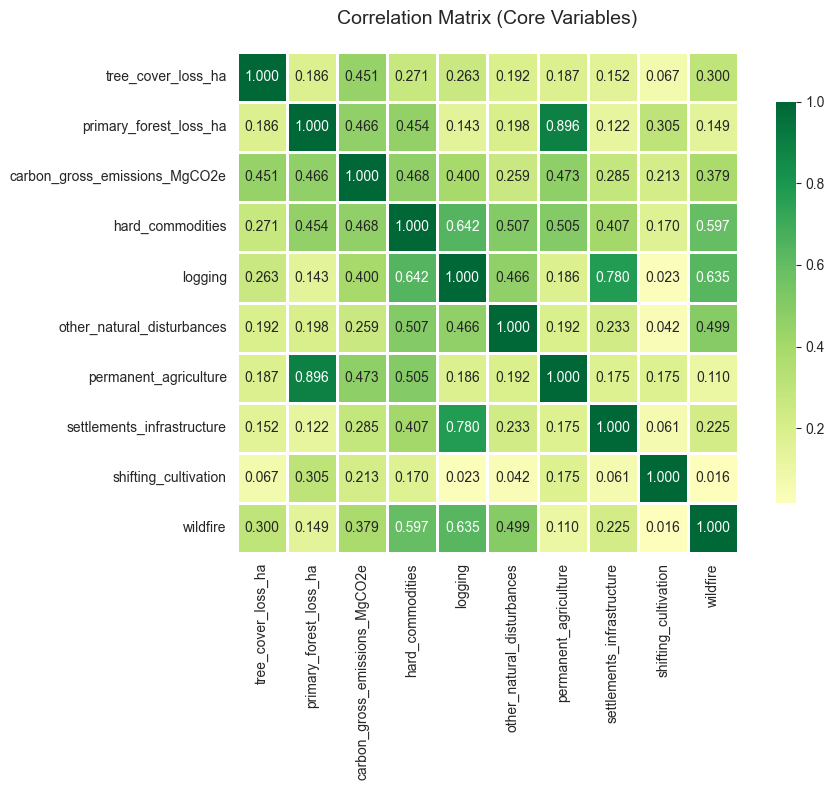

In [12]:
num_cols = ["tree_cover_loss_ha", "primary_forest_loss_ha",
            "carbon_gross_emissions_MgCO2e"]

if 'driver_cols' in locals():
    num_cols.extend([c for c in driver_cols if c in df.columns])

num_cols = [c for c in num_cols if c in df.columns]

if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="RdYlGn", center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                fmt='.3f')
    plt.title("Correlation Matrix (Core Variables)", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns for correlation analysis")


### 7. Primary Forest Loss vs Total Tree Cover Loss Comparison


In [13]:
if 'primary_forest_loss_ha' in df.columns:
    yearly_primary_loss = df.groupby("year", as_index=False)["primary_forest_loss_ha"].sum()
    
    comparison = yearly_loss.merge(yearly_primary_loss, on='year', how='left')
    comparison['primary_loss_pct'] = (comparison['primary_forest_loss_ha'] / 
                                      comparison['tree_cover_loss_ha'] * 100)

    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=comparison['year'],
        y=comparison['tree_cover_loss_ha'],
        name='Total Tree Cover Loss',
        line=dict(color='red', width=2)
    ))
    
    fig.add_trace(go.Scatter(
        x=comparison['year'],
        y=comparison['primary_forest_loss_ha'],
        name='Primary Forest Loss',
        line=dict(color='darkred', width=2)
    ))
    
    fig.update_layout(
        title="🌲 Primary Forest Loss vs Total Tree Cover Loss",
        xaxis_title="Year",
        yaxis_title="Loss (hectares)",
        hovermode='x unified'
    )
    fig.show()
else:
    print("⚠️ Primary forest loss column not found")
